Name : Nisarga Vishwamanjuswamy

CRN : 21944

Online Retail - II Dataset

Overview:
The Online Retail - II dataset provides insights into the sales activities of an online store spanning from December 1, 2009, to December 9, 2011. This dataset encompasses a wide range of souvenir products, primarily targeting corporate customers.

Objective:
The primary objective of this dataset is to facilitate the development of customer-centric strategies through the integration of Customer Relationship Management (CRM) with Analytics. By leveraging RFM (Recency, Frequency, Monetary) Analysis, businesses can gain deeper insights into customer behavior and preferences.

In [24]:
# This code imports the pandas library as pd.
# It also imports the datetime library as dt and warnings library to filter warnings.
import pandas as pd
import datetime as dt
import warnings

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

In [25]:
df = pd.read_csv('online_retail_II.csv')

In [26]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [28]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key):
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns=['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum())) / len(dataset[key]) * 100, columns=['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(
        x=null_feat.index,
        y=null_feat['Count'],
        opacity=0.8,
        text=percentage_null['Count'],
        textposition='auto',
        marker=dict(
            color='#7EC0EE',  # Change the color of bars
            line=dict(
                color='#000000',
                width=1.5
            )
        ),
        width=0.3,  # Adjust the width of bars
    )

    layout = dict(title="Missing Values (count & %)", plot_bgcolor='rgba(0,0,0,0)',
                  xaxis=dict(title="Features"), yaxis=dict(title="Count"))

    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)

In [29]:
# Plotting bar graph
missing_plot(df, 'Invoice')

In [30]:
df["Description"].nunique()

4681

In [31]:
# Get the top 10 most preferred products
most_preferred_products = df['Description'].value_counts()[:10]

# Create the bar plot
fig = px.bar(x=most_preferred_products.index,
             y=most_preferred_products.values,
             color=most_preferred_products.index,
             text=most_preferred_products.values,
             title="Top 10 Most Preferred Products Per Shop",
             labels={'x': 'Product', 'y': 'Count'})

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Product",
    yaxis_title="Count",
    font=dict(size=12, family="Arial"),
    title_font=dict(size=16, family="Arial")
)

# Show the plot
fig.show()

In [32]:
# Descending order of how many units of each product were purchased in total
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head()

,Quantity
Description,
WHITE HANGING HEART T-LIGHT HOLDER,57733
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54698
BROCADE RING PURSE,47647
PACK OF 72 RETRO SPOT CAKE CASES,46106
ASSORTED COLOUR BIRD ORNAMENT,44925


from matplotlib import pyplot as plt
_df_14['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

In [33]:
# Calculate the total cost per invoice.
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [37]:
# Descending order of how much was each invoice?
df.groupby("Invoice").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head()

,TotalPrice
Invoice,
533027,49844.99
531516,45332.97
493819,44051.60
524181,33167.80
526934,26007.08


from matplotlib import pyplot as plt
_df_12['TotalPrice'].plot(kind='hist', bins=20, title='TotalPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['TotalPrice'].plot(kind='line', figsize=(8, 4), title='TotalPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0
TotalPrice,0


In [39]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom,30.0


In [40]:
# Convert 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create 'date', 'month', 'week', and 'time' columns
df['date'] = df['InvoiceDate'].dt.strftime('%m/%d/%Y')
df['month'] = df['InvoiceDate'].dt.strftime('%B')
df['week'] = df['InvoiceDate'].dt.strftime('%A')
df['time'] = df['InvoiceDate'].dt.strftime('%H')

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,date,month,week,time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12/01/2009,December,Tuesday,07
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12/01/2009,December,Tuesday,07
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12/01/2009,December,Tuesday,07
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12/01/2009,December,Tuesday,07
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12/01/2009,December,Tuesday,07


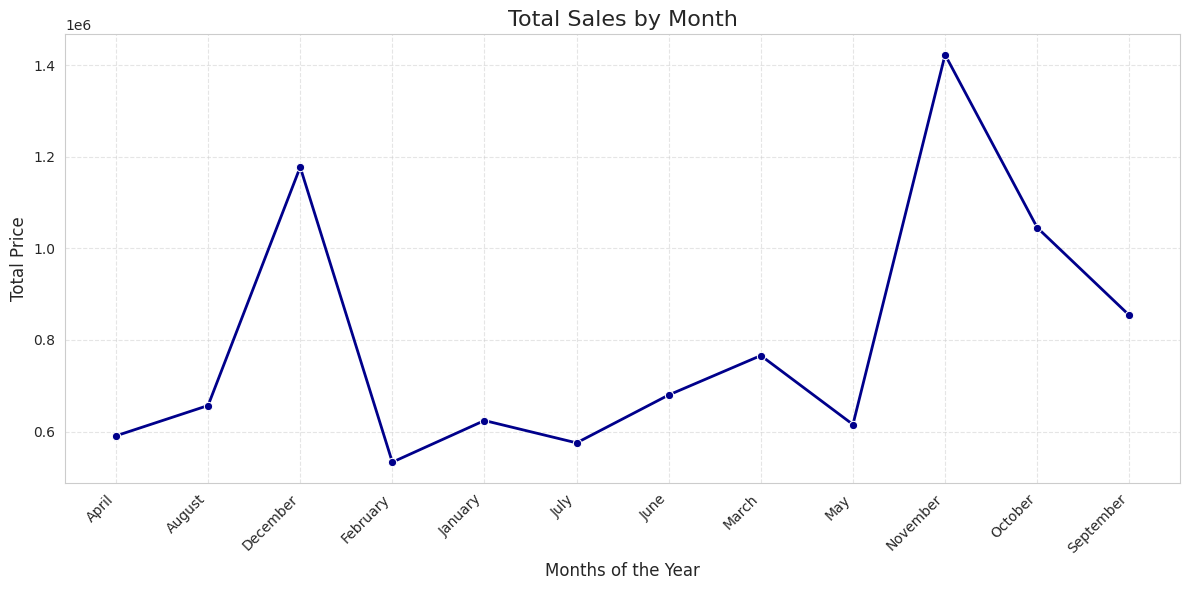

In [41]:
# Calculate the total sales by month
df_months = df.groupby('month').agg({'TotalPrice': 'sum'}).reset_index()

# Set the style
sns.set_style("whitegrid")

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_months, x='month', y='TotalPrice', marker='o', color='darkblue', linewidth=2)
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Total Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.tight_layout()
plt.show()

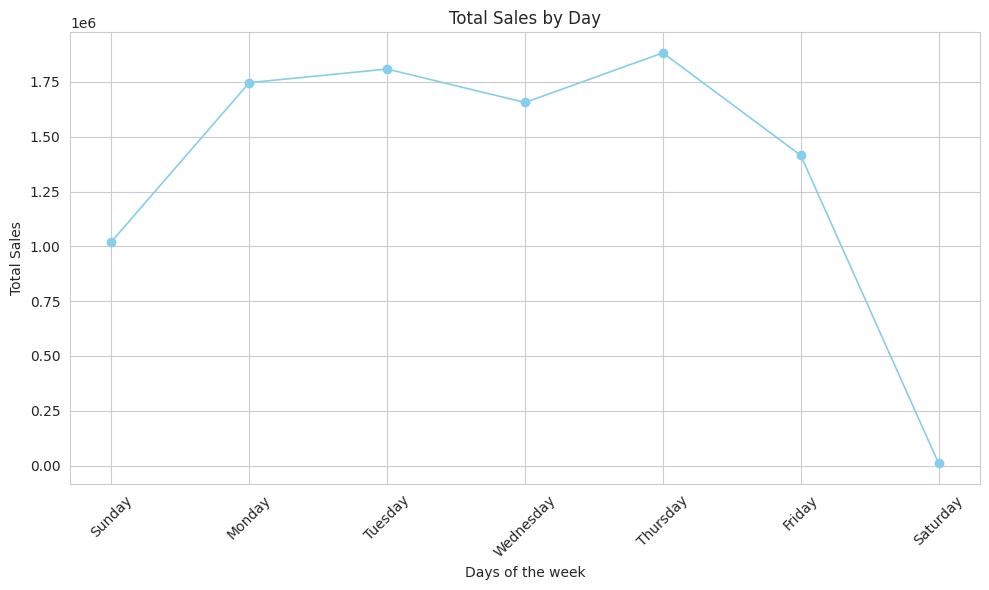

In [42]:
# Assume 'data' is your DataFrame containing 'week' and 'Total_sales' columns

# Calculating total sales on a daily basis
daywise = df.groupby('week').agg({'TotalPrice': 'sum'}).reset_index()

# Reordering the table according to weekdays
daywise['week'] = pd.Categorical(daywise['week'], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)
daywise = daywise.sort_values('week')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(daywise['week'], daywise['TotalPrice'], marker='o', color='skyblue', linewidth=1.2, markersize=6)
plt.title('Total Sales by Day')
plt.xlabel('Days of the week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

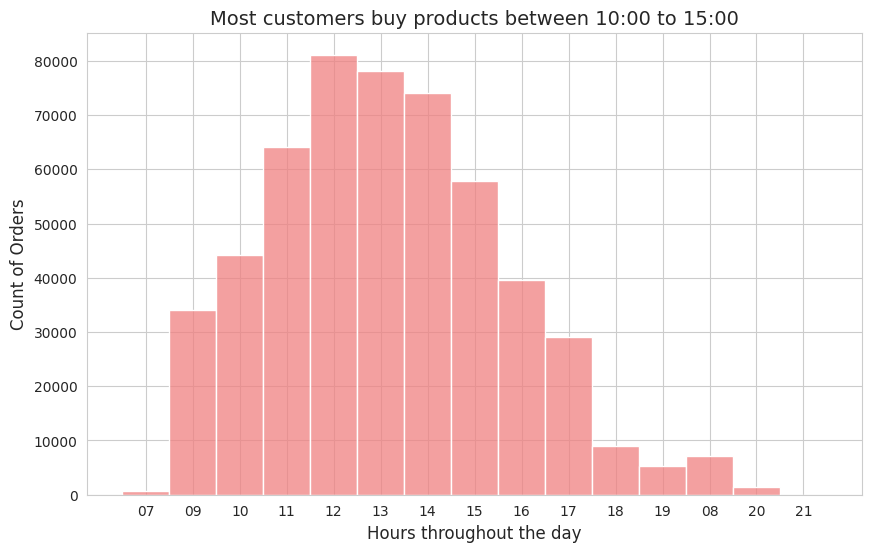

In [43]:
# Set the style
sns.set_style("whitegrid")

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time', bins=24, color='lightcoral', kde=False)
plt.xlabel('Hours throughout the day', fontsize=12)
plt.ylabel('Count of Orders', fontsize=12)
plt.title('Most customers buy products between 10:00 to 15:00', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()